# **PRACTICAL NO 1**
# **Write a program for pre-processing of a text document such as stop word removal, stemming**

In [36]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
text = 'The quick brown fox jumps over the lazy dog While the dog sleeps the fox quickly runs to the nearby forest'

text=text.lower()
tokens=word_tokenize(text)
print(tokens)

filteredtext=[word for word in tokens if word not in stopwords.words('english')]
print(filteredtext)

stemmer=PorterStemmer()
stemmedtext=[stemmer.stem(word) for word in filteredtext]
print(stemmedtext)

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'while', 'the', 'dog', 'sleeps', 'the', 'fox', 'quickly', 'runs', 'to', 'the', 'nearby', 'forest']
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'dog', 'sleeps', 'fox', 'quickly', 'runs', 'nearby', 'forest']
['quick', 'brown', 'fox', 'jump', 'lazi', 'dog', 'dog', 'sleep', 'fox', 'quickli', 'run', 'nearbi', 'forest']


#**Practical NO 2**
#**Implement a program for retrieval of documents using inverted files.**

In [7]:
from collections import defaultdict

# Build inverted index
def build_index(docs):
    index = defaultdict(list)
    for doc_id, text in docs.items():
        for word in text.lower().split():
            if doc_id not in index[word]:
                index[word].append(doc_id)
    return index

# Search query in index
# Search query in index
def search(query, index):

    words = query.lower().split()
    # Find documents for each word in the query and take the intersection of all sets
    docs_with_all_words = set(index[words[0]])

    for word in words[1:]:
        docs_with_all_words &= set(index[word])  # Intersect with documents containing the current word
    return list(docs_with_all_words)

# Sample documents
docs = {
    1: "Machine learning is a subset of AI",
    2: "AI and machine learning are transforming tech",
    3: "Machine learning relies on data",
    4: "AI is used in technology for predictive tasks"
}

# Build index and search
index = build_index(docs)
print("Inverted Index:", index)
print("Documents found:", search("learning", index))

Inverted Index: defaultdict(<class 'list'>, {'machine': [1, 2, 3], 'learning': [1, 2, 3], 'is': [1, 4], 'a': [1], 'subset': [1], 'of': [1], 'ai': [1, 2, 4], 'and': [2], 'are': [2], 'transforming': [2], 'tech': [2], 'relies': [3], 'on': [3], 'data': [3], 'used': [4], 'in': [4], 'technology': [4], 'for': [4], 'predictive': [4], 'tasks': [4]})
Documents found: [1, 2, 3]


#**Practical NO 3**
#**Implement e-mail spam filtering using text classification algorithm with appropriate dataset**

In [35]:
import pandas as pd, numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("spam.csv")

df = df.iloc[:, :2]
print(df)

print(df.isnull().sum())
df.dropna(inplace=True)

cv = CountVectorizer()
labelenc = LabelEncoder()

# Apply CountVectorizer to the 'v2' column (assuming it contains text data)
# to generate features for each data point in your DataFrame
x = cv.fit_transform(df['v2'])  # Changed from ['v2df'] to df['v2']

y = labelenc.fit_transform(df['v1'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = SVC()
model.fit(X_train, y_train) # Changed from x_train to X_train

model.score(X_test, y_test) # Changed from x_test to X_test

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5566  spam  This is the 2nd time we have tried 2 contact u...
5567   ham              Will �_ b going to esplanade fr home?
5568   ham  Pity, * was in mood for that. So...any other s...
5569   ham  The guy did some bitching but I acted like i'd...
5570   ham                         Rofl. Its true to its name

[5571 rows x 2 columns]
v1    0
v2    1
dtype: int64


0.9763101220387652

#**Practical NO 4**
#**Implement Page Rank Algorithm. (Use python or beautiful soup for implementation).**

In [2]:
def pagerank(graph, num_iterations=100, d=0.85):
    n = len(graph)
    ranks = {node: 1 / n for node in graph}  # Start with equal rank for each page

    for _ in range(num_iterations):
        new_ranks = {}
        for node in graph:
            # Calculate rank by summing contributions from each linking page
            rank_sum = sum(ranks[neighbor] / len(graph[neighbor]) for neighbor in graph if node in graph[neighbor])
            new_ranks[node] = (1 - d) / n + d * rank_sum  # Apply damping factor

        ranks = new_ranks  # Update ranks for next iteration

    return ranks

# Example graph: each node has a list of pages it links to
graph = {
    0: [1, 2],
    1: [0, 2],
    2: [0]
}

print("PageRank values:", pagerank(graph))


PageRank values: {0: 0.43274853801169594, 1: 0.23391812865497078, 2: 0.3333333333333333}


#**Practical NO 5**
#**Implement Agglomerative hierarchical clustering algorithm using appropriate dataset**

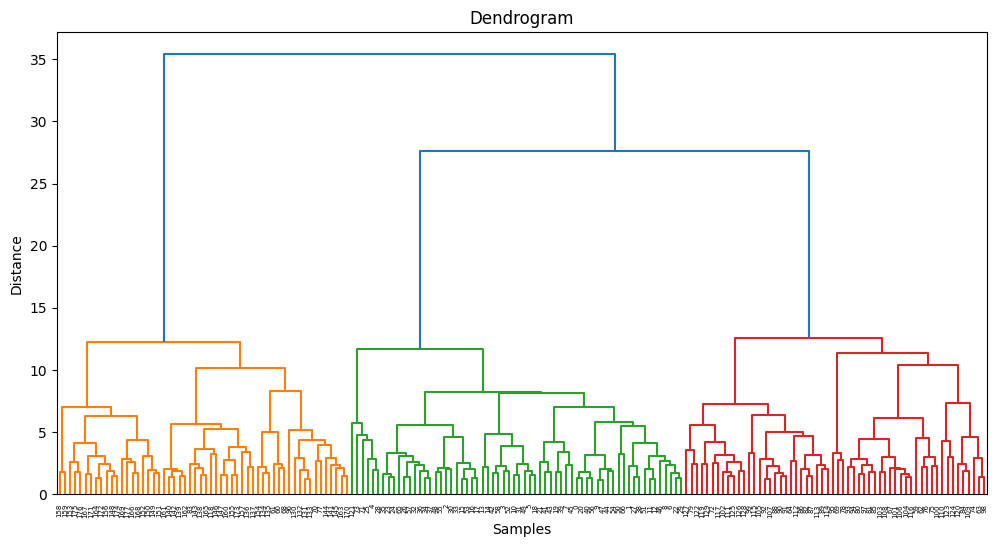

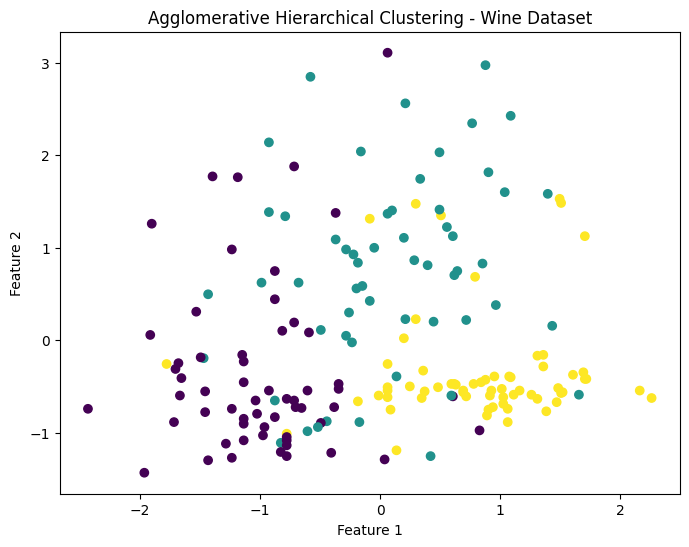

Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Target Values:
0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64


In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_names])

# Perform Agglomerative Hierarchical Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)

# Compute the linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering - Wine Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print cluster labels and target values
print("Cluster Labels:")
print(labels)
print("\nTarget Values:")
print(df['target'])